In [2]:
import cv2
import numpy as np
from PIL import Image
import os
import numpy
from matplotlib import pyplot as plt 
from keras.datasets import mnist
import tqdm
import torch

In [3]:
(trainX, trainy), (testX, testy) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


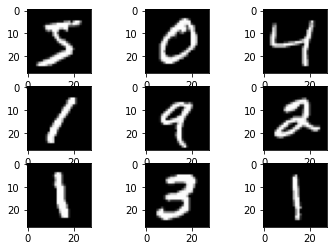

In [4]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [5]:
X = []
for i in range(len(trainX)): #Flattening all the images and storing in X
    X.append(trainX[i].ravel())

In [6]:
X = np.array(X) #Converting list to numpy
X.shape

(60000, 784)

In [7]:
M = X - X.mean(axis=0) #mean subtracted images
mean = X.mean(axis=0)

In [8]:
print(type(mean))
print(mean.shape)

<class 'numpy.ndarray'>
(784,)


In [9]:
M.shape

(60000, 784)

In [10]:
def PCA(M):
    C = np.cov(M.T) #shape : (164, 164)
    print("Covariance matrix dimensions = ",C.shape)
    U, V = np.linalg.eigh(C) # U -values, V- vectors
    print(f"U : {U.shape}, V : {V.shape}")
    return [U, V]

In [11]:
U, V = PCA(M)

Covariance matrix dimensions =  (784, 784)
U : (784,), V : (784, 784)


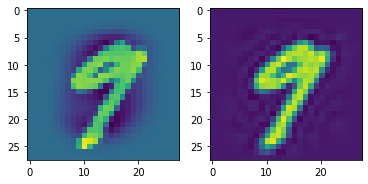

In [12]:
testface = testX[20] - X.mean(axis=0).reshape((28,28))
_, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(testface)
rec = recon_face = X.mean(axis=0) + V[:, -200:] @ V[:, -200:].T @ testface.flatten()
rface = rec.reshape((28,28))
ax[1].imshow(rface)
plt.show()

In [13]:
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  
device = torch.device(dev)  

X = torch.from_numpy(X)
X = X.to(device)
trainX = torch.from_numpy(trainX)
trainX = trainX.to(device)

In [14]:
V = torch.from_numpy(V)
V = V.to(device)

In [15]:

mean = torch.from_numpy(mean)
mean = mean.to(device)

In [16]:

recovered = []
for i in tqdm.notebook.tqdm(range(len(X))):
    temp = trainX[i] - mean.reshape((28,28))
    recon_face = mean + V[:, -200:] @ V[:, -200:].T @ temp.flatten()
    recovered.append(recon_face)
    recovered[i] = recovered[i].reshape((28,28))
    #print(i,"image reconstructed")

[]

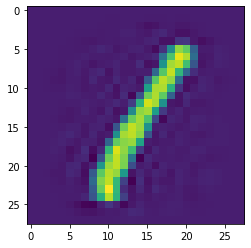

In [17]:
temp = recovered[3].to("cpu")
plt.imshow(temp.reshape(28,28))
plt.plot()

In [19]:
trainX = trainX.double()

In [20]:
dist = torch.cdist(trainX[0], trainX[1], p=2.0, compute_mode='use_mm_for_euclid_dist_if_necessary')

In [21]:
t = torch.dist(trainX[3],trainX[6],p=2)

In [34]:
testX = torch.from_numpy(testX)
testX = testX.to(device)
print(testX.shape)

torch.Size([10000, 28, 28])


In [59]:
dist = []
for i in tqdm.notebook.tqdm(range(len(trainX))):
  temp = torch.dist(trainX[i],testX[0],p=2)
  temp = temp.to("cpu").numpy()
  dist.append(temp)
  
    


In [61]:
for i in range(10):
  print(dist[i])

2395.7956924579357
2650.63030239979
2407.308247815389
2556.6096690734785
2345.209159115664
2468.432498570702
2377.465036546279
2644.5655597848204
2167.94833886788
2265.932037815786


In [63]:
dist = numpy.array(dist)

In [81]:
print(dist.shape)
c = np.zeros((60000,1))
numpy.vstack((dist,c))

(60000,)


ValueError: ignored

In [77]:
numpy.hstack()

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
temp = dist.to("cpu")
plt.imshow(temp.reshape(28,28))
plt.plot()